# LDA Topic Modeling Analysis of Tweets

# Abstract

This Kaggle notebook presents an in-depth analysis of a dataset comprising tweets collected from January to March 2023, utilizing Latent Dirichlet Allocation (LDA) for Topic Modeling. The primary objective of this study was to uncover the prevalent themes and topics in these tweets, offering insights into public discourse during this period.

Through meticulous preprocessing and the application of LDA, two distinct themes emerged from the dataset. The first theme, characterized by words such as "human," "good," "work," and "try," reflects a societal inclination towards personal development and engagement with the world. The second theme, highlighted by terms like "Google," "Microsoft," "Bing," and "business," points to a strong focus on technology, business, and learning.

The coherence score analysis played a crucial role in determining the optimal number of topics, with the highest coherence score observed at two topics. This finding was instrumental in ensuring the clarity and relevance of the themes extracted. The word clouds generated provided a visual representation of the dominant words in each theme, further validating the results of the LDA analysis.

This study not only demonstrates the efficacy of LDA Topic Modeling in extracting meaningful information from large text datasets but also provides a snapshot of the collective concerns and interests of Twitter users in early 2023. The insights gained from this analysis are valuable for understanding public sentiment and trends, offering a unique perspective on societal dynamics during this period.


## Introduction

In this notebook, we delve into the fascinating world of Natural Language Processing (NLP) by applying Latent Dirichlet Allocation (LDA) for topic modeling analysis. Our focus is on a dataset comprising tweets collected from January to March 2023. This period is particularly interesting due to the dynamic and evolving nature of public discourse on social media platforms like Twitter.

## Dataset Overview

The dataset used in this analysis is a rich collection of tweets, offering a glimpse into the public sentiment and trending topics during the first quarter of 2023. It includes a wide range of tweets, reflecting the diverse and multifaceted conversations happening on Twitter. This dataset provides an excellent opportunity to explore and uncover underlying themes and topics using LDA, a popular technique in NLP for topic modeling.

## Objective

Our primary objective is to apply LDA Topic Modeling to this dataset to identify prevalent themes and topics in the tweets. By doing so, we aim to gain insights into the public discourse during this period. This analysis will not only demonstrate the power of LDA in extracting meaningful information from large text corpora but also provide a deeper understanding of the collective thoughts and concerns expressed on Twitter during these months.

## Methodology

We will begin by preprocessing the data, which involves cleaning and preparing the tweets for analysis. This step is crucial for ensuring the quality and reliability of our topic modeling results. Following this, we will implement LDA to discover the latent topics within our dataset. The effectiveness of LDA in uncovering these topics will be evaluated, and the results will be visualized to provide a clear and intuitive understanding of the topics prevalent in the tweets.

Join us as we embark on this analytical journey to uncover the hidden topics in a sea of tweets using LDA Topic Modeling.
This in

<sup> **The text was reviewed and corrected by chatGPT due to English not being my first language** </sup>

In [2]:
import pandas as pd
import spacy
from spacy.lang.en import English

# Load the dataset

In [3]:
# Load the dataset
raw_df = pd.read_csv("/kaggle/input/500k-chatgpt-tweets-jan-mar-2023/Twitter Jan Mar.csv")
raw_df.head(7)

The dataset is loaded into a pandas DataFrame, and the first seven entries are displayed to understand the data structure.

# Data Preprocessing

In [5]:
nlp = spacy.load("en_core_web_sm",  exclude=["parser", "ner"])

Here, the spaCy library is used to load the English model while excluding the parser and named entity recognizer for efficiency during tokenization.

## Defining specific stopwords to this dataset

In [7]:
custom_stopwords= ['chatgpt', 'chat', 'gpt', 'ai', 'openai', 'generative','technology', 'tech', 'new','tool', 'write', 'ask', 'like', 'amp', 'openaichatgpt', 'chatgptplus', 'algorithm', 'llm', 'chatbot', 'use', 'make', 'will', 'say', 'one', 'bot','model', 'artificial', 'intelligence', 'artificialintelligence', 'let', 'ask', 'know', 'think', 'time', 'answer', 'question','create', 'help', 'need', 'way', 'prompt', 'generate', 'get', 'thing', 'search', 'want', 'language' ]

## Sampling the Dataset

In [62]:
tweets = raw_df["content"]

tweets_sample = tweets.sample(frac=1, random_state=35)

* `tweets`: Extracts the tweet texts from the dataframe.
* `tweets_sample`: Creates a random subset containing 100% of the tweets, ensuring reproducibility with a set random state.

## Preprocessing Function

The `preprocess` function performs cleaning and tokenization of tweet texts.

In [57]:
# Function to preprocess the tweets
def preprocess(tweets):
    # Replace NaN values with an empty string
    tweets = tweets.fillna('')
    
    # Remove @mentions and '#' from hashtags
    tweets = [' '.join(word for word in tweet.split() if not word.startswith('@')) for tweet in tweets]
    tweets = [tweet.replace('#', '') for tweet in tweets]

    # Tokenize and lemmatize tweets, excluding stopwords and custom stopwords
    processed_docs = []
    for tweet in tweets:
        doc = nlp(tweet)
        processed_doc = []
        for token in doc:
            
            if (token.is_alpha and len(token.text) >= 2 and token.lower_ not in custom_stopwords and not token.is_stop and token.lemma_ not in custom_stopwords ):
                processed_doc.append(token.lemma_)
            else:
                pass
            
            
        processed_docs.append(processed_doc)
    return processed_docs

* Removes user mentions and hashtags for cleaner text analysis.
* Tokenizes tweets into words, filters out short and stop words, and lemmatizes the remaining tokens.
* Builds a list of processed tweets, with each tweet represented as a list of its significant lemmas.

## Applying Preprocessing and Viewing Results

After defining the preprocessing function, it's applied to the sampled tweets.


In [64]:
processed_docs = preprocess(tweets_sample)
processed_docs[0:5]

[['integrate',
  'innovate',
  'sale',
  'process',
  'check',
  'linkedin',
  'post',
  'today',
  'share',
  'revolutionize',
  'sell'],
 ['discuss', 'request', 'well', 'compose', 'maybe'],
 ['start',
  'experiment',
  'project',
  'project',
  'mint',
  'live',
  'hour',
  'mythology',
  'catcher',
  'friend',
  'Gepetto',
  'kind',
  'social',
  'experiment',
  'aim'],
 ['opinion',
  'base',
  'justice',
  'system',
  'PsychoPass',
  'intriguing',
  'comment'],
 ['domain',
  'sale',
  'Available',
  'acquire',
  'DomainNameForSale',
  'Domains',
  'domainsforsale',
  'Metaverse',
  'NFTCommunity',
  'nftart',
  'nfts']]

* `processed_docs`: This variable holds the output from the preprocess function, which is a list of lists containing the processed tokens for each tweet.
* This line of code retrieves and displays the first five processed documents from the `processed_docs` list, allowing for a quick check of the preprocessing quality.

## Word Cloud Generation

A Word Cloud is generated to visualize the most common words in the processed tweets.

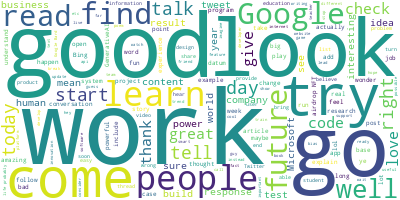

In [66]:
from wordcloud import WordCloud

# Flatten the list of processed docs into a single list of words
all_words = [word for doc in processed_docs for word in doc]

# Join all words into a single string, which is required to generate a word cloud
all_words_string = ' '.join(all_words)

# Initialize the WordCloud object with specific aesthetics
wordcloud = WordCloud(background_color="white", max_words = 500, contour_width=3, contour_color="steelblue")

# Generate the word cloud from the string of all words
wordcloud.generate(all_words_string)

# Create an image from the word cloud and display it
wordcloud.to_image()

* `all_words`: A list that aggregates all words from each document into one flat list.
* `all_words_string`: A single string created by joining all words. This is the input for the WordCloud.
* `wordcloud`: An instance of the `WordCloud` class, configured to display a maximum of 500 words with a white background and blue contours.
* `wordcloud.generate()`: This method creates the word cloud using the aggregated string of words.
* `wordcloud.to_image()`: Converts the word cloud into an image for visualization.

### Word Cloud - Overview
- **Dominant Words**: "good," "work," "people," "learn," "go"
- **Analysis**: Indicates these words are most frequent in the dataset, likely representing key topics or themes.

## Dictionary and Corpus Creation for LDA

The following code block initializes the dictionary and corpus needed for LDA topic modeling.


In [67]:
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

In [70]:
# Create a dictionary mapping from word IDs to words
id2word = corpora.Dictionary(processed_docs)

# Filter out tokens that appear in less than 10 documents or more than 40% of the documents
id2word.filter_extremes(no_below=10, no_above=0.4)

* `id2word`: A Gensim Dictionary object that assigns a unique integer ID to all words in the corpus.
* `filter_extremes`: A method to remove tokens that are too rare or too common across documents.

In [ ]:
# Convert the list of processed documents into a document-term matrix
corpus = []
for i, doc in enumerate(processed_docs):
    
    # Provide a status update for every 1000 documents processed
    if i % 1000 == 0:  
        print(f"Processing document {i}/{len(processed_docs)}")
    
    # Create a bag-of-words representation of each document
    corpus.append(id2word.doc2bow(doc))

* `corpus`: A list of bag-of-words (BoW) vectors, each representing a document. Each BoW vector is a list of tuples where each tuple is a (word ID, word frequency) pair.
* `doc2bow`: A method that converts a collection of words to its bag-of-words representation.

## LDA Model Training and Coherence Evaluation

This code block is designed to train multiple LDA models with varying numbers of topics to identify the most coherent model.

In [72]:
model_list = []
topic_numbers = [2, 3 , 4, 5, 10, 15, 20, 25, 30]  # List of number of topics to try

coherence_values = []

# Train LDA models for different numbers of topics and calculate their coherence scores
for num_topics in topic_numbers:
    # Train an LDA model with the current number of topics
    model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics, workers=5)
    # Add the trained model to the list of models
    model_list.append(model)
    # Initialize a CoherenceModel with the current model to compute its coherence score
    coherencemodel = CoherenceModel(model=model, texts=processed_docs, dictionary=id2word, coherence='u_mass')
    # Calculate and store the coherence score for the current model
    coherence_values.append(coherencemodel.get_coherence())

* `model_list`: A list to store each trained LDA model.
* `topic_numbers`: A list specifying the different numbers of topics to train separate LDA models for.
* `coherence_values`: A list to store the coherence score of each LDA model, which measures the semantic similarity between high scoring words in the topics.
* `LdaMulticore`: A class from Gensim that trains an LDA model using multiple CPU cores for parallelization.
* `CoherenceModel`: A class used to evaluate the coherence of the trained LDA models, with 'u_mass' being the type of coherence measure used.

## Coherence Score Visualization and Best Model Selection

The following code visualizes the coherence scores for each LDA model and identifies the model with the highest score.

In [45]:
import matplotlib.pyplot as plt

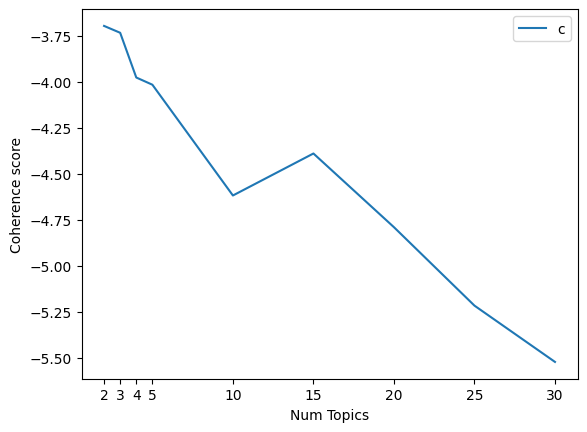

Num Topics = 2  has Coherence Value of -3.6963
Num Topics = 3  has Coherence Value of -3.7336
Num Topics = 4  has Coherence Value of -3.9766
Num Topics = 5  has Coherence Value of -4.0157
Num Topics = 10  has Coherence Value of -4.6174
Num Topics = 15  has Coherence Value of -4.3893
Num Topics = 20  has Coherence Value of -4.7896
Num Topics = 25  has Coherence Value of -5.2157
Num Topics = 30  has Coherence Value of -5.5215


In [73]:
# Plot the coherence scores against the number of topics
plt.plot(topic_numbers, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.xticks(topic_numbers)
plt.legend(("coherence_values"), loc='best')
plt.show()


# Output the coherence scores for each model
for m, cv in zip(topic_numbers, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

* The coherence scores are plotted against the number of topics to visually assess the performance of different models.
* The `plt` functions set up the plot with appropriate labels, ticks, and legends.
* The loop prints out the number of topics and the corresponding coherence value for each model.


### Coherence Score Plot - Overview
- **Trend**: Coherence score decreases as the number of topics increases.
- **Optimal Topics**: Highest coherence score at 2 topics.

## Defining the best model

In [74]:
# Identify the index of the model with the highest coherence score
best_model_index = coherence_values.index(max(coherence_values))

# Select the best model from the list of models
best_lda_model = model_list[best_model_index]

# Determine the number of topics for the best model
best_num_topics = topic_numbers[best_model_index]

# Print information about the best model
print(f"The best LDA model has {best_num_topics} topics with a coherence of {max(coherence_values)}")

The best LDA model has 2 topics with a coherence of -3.6963370965572464


* `best_model_index` finds the position of the highest coherence score in the list.
* `best_lda_model` and `best_num_topics` identify and store the best model and its number of topics based on the highest coherence score.
* The final print statement outputs the number of topics and coherence score of the best model.

## Displaying Top Words and Word Clouds for Each Topic

The code below extracts and prints the top words for each topic from the best LDA model and generates a word cloud for each topic.

In [75]:
# Iterate through each topic in the best LDA model
for i, topic in best_lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=False):
    # Extract the top words for the current topic
    topic_words = [word for word, prob in topic]
    # Print the top words for the topic
    print(f"Top words for topic #{i}: {topic_words}")

Top words for topic #0: ['human', 'good', 'work', 'go', 'try', 'people', 'code', 'well', 'find', 'world']
Top words for topic #1: ['Google', 'Microsoft', 'Bing', 'business', 'power', 'Bard', 'check', 'build', 'future', 'learn']


* The loop prints the top 10 words for each topic in the best LDA model.
* `show_topics`: A method that returns the most significant words for each topic along with their probabilities.
* `topic_words`: A list of just the words (excluding probabilities) for the current topic.

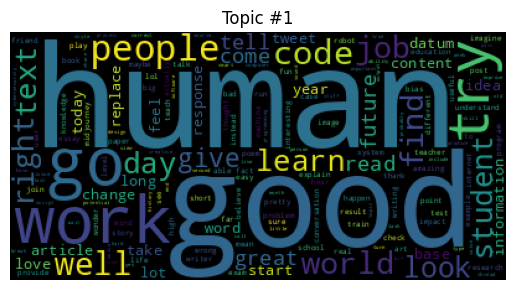

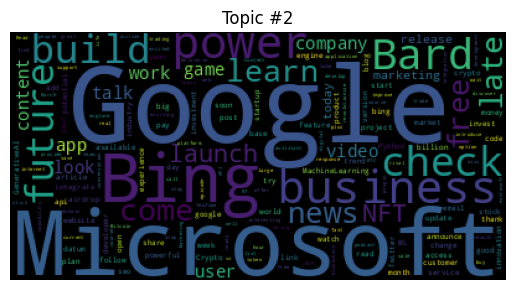

In [76]:
# Generate and display a word cloud for each topic
for t in range(best_lda_model.num_topics):
    plt.figure()
    # Create a word cloud from the top 200 words of the current topic
    plt.imshow(WordCloud().fit_words(dict(best_lda_model.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t+1))
    plt.show()

* This loop generates a word cloud for each topic using the top 200 words to give a visual representation of the topic's word distribution.
* `WordCloud().fit_words`: This method takes a dictionary of word frequencies and generates a word cloud.
* `plt.figure()`: Creates a new figure for each word cloud.

### Word Cloud - Overview

**Topic** #1
- **Dominant Words**: "human," "good," "work," "go," "try," "people," "code," "well," "find," "world"
- **Analysis**: Suggests a theme centered around personal development, effort, and engagement with the world.

**Topic #2
- **Dominant Words**: "Google," "Microsoft," "Bing," "business," "power," "Bard," "check," "build," "future," "learn"
- **Analysis**: Indicates a focus on technology, business, and learning.



# Conclusion

Our journey through the application of LDA Topic Modeling on the tweet dataset from January to March 2023 has yielded insightful results. The analysis has not only demonstrated the effectiveness of LDA in topic modeling but also provided a fascinating glimpse into the prevalent themes and topics in the tweets during this period.

### Key Findings

1. **Dominant Themes**: The analysis revealed two dominant themes in the dataset. The first theme, represented by words like "human," "good," "work," "go," and "try," suggests a focus on personal development, effort, and engagement with the world. The second theme, highlighted by words such as "Google," "Microsoft," "Bing," "business," and "power," points towards a strong inclination towards technology, business, and learning.

2. **Optimal Topic Number**: The coherence score plot indicated that the optimal number of topics for this dataset is two. This was further corroborated by the high coherence score of -3.6963370965572464, suggesting that the two-topic model effectively captures the main themes of the dataset with clear delineation.

3. **General Overview**: The word cloud provided a general overview of the most frequent words in the dataset, such as "good," "work," and "people," which aligns well with the themes identified through the LDA analysis.

### Implications

This analysis underscores the power of LDA Topic Modeling in extracting meaningful themes from large text corpora. The identified themes reflect the collective concerns and interests of Twitter users during the first quarter of 2023, offering valuable insights into public sentiment and discourse. The focus on personal development and technology/business indicates a societal trend towards self-improvement and a keen interest in technological advancements and business dynamics.

### Future Work

Further research could involve a more detailed temporal analysis to understand how these themes evolved over the three months. Additionally, incorporating sentiment analysis could provide a deeper understanding of the emotions associated with these topics.

In conclusion, this notebook has successfully applied LDA Topic Modeling to uncover significant themes in a dataset of tweets, providing a window into the public discourse of early 2023. The insights gained from this analysis not only demonstrate the capabilities of NLP techniques but also offer a snapshot of societal trends and interests during this period.